<h1>Table of Contents &lt;br&gt;&lt;/br&gt;<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Imports-and-Data-loading" data-toc-modified-id="Imports-and-Data-loading-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Imports and Data loading</a></span></li></ul></li><li><span><a href="#Cleaning-Trip-Data" data-toc-modified-id="Cleaning-Trip-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Cleaning Trip Data</a></span></li><li><span><a href="#Demand-Patterns" data-toc-modified-id="Demand-Patterns-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Demand Patterns</a></span><ul class="toc-item"><li><span><a href="#Yearly-rental-patterns" data-toc-modified-id="Yearly-rental-patterns-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Yearly rental patterns</a></span></li><li><span><a href="#Weekly-Pattern-of-connected-EVS" data-toc-modified-id="Weekly-Pattern-of-connected-EVS-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Weekly Pattern of connected EVS</a></span></li><li><span><a href="#Daily-Pattern-of-connected-EVS" data-toc-modified-id="Daily-Pattern-of-connected-EVS-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Daily Pattern of connected EVS</a></span></li></ul></li></ul></div>

## Imports and Data loading

In [1]:
# Display plots inline
%matplotlib inline

# Autoreload all package before excecuting a call
%load_ext autoreload
%autoreload 2

In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from vppsim.data import load_car2go_demand

# Cleaning Trip Data

In [8]:
trips = pd.read_pickle("../data/processed/trips_big.pkl")

In [17]:
trips[trips['trip_distance'].notna()]

,index,EV,start_time,start_address,start_lat,start_lon,start_soc,end_time,end_address,end_lat,end_lon,end_soc,end_charging,trip_duration,trip_distance
0,0,S-GO2259,1458604835,"Traubergstraße 46, 70186 Stuttgart",9.20017,48.76976,52,1458605158,"Traubergstraße 48, 70186 Stuttgart",9.20020,48.76978,52,0,5,0.00
2,2,S-GO2257,1458605158,"Theodor-Veiel-Straße 84, 70374 Stuttgart",9.24640,48.80992,63,1458605421,"Theodor-Veiel-Straße 87, 70374 Stuttgart",9.24644,48.80998,63,0,4,0.00
3,3,S-GO2388,1458605158,"Windhalmweg 17, 70599 Stuttgart",9.20799,48.70620,55,1458605421,"Erisdorfer Straße 55 - 59, 70599 Stuttgart (Um...",9.20219,48.72643,55,1,4,0.00
4,4,S-GO2159,1458605159,"Tiroler Straße 23, 70329 Stuttgart",9.28382,48.77443,63,1458605422,"Tiroler Straße 24, 70329 Stuttgart",9.28383,48.77450,63,0,4,0.00
5,7,S-GO2366,1458605160,"Höhbergstraße 54, 70327 Stuttgart",9.24428,48.76927,43,1458606630,"Warthäuser Straße 5, 70327 Stuttgart",9.24530,48.77125,36,1,24,7.42
6,8,S-GO2484,1458605160,"Lehenstraße 49, 70180 Stuttgart",9.17351,48.76038,65,1458605423,"Lehenstraße 51, 70180 Stuttgart",9.17345,48.76029,65,0,4,0.00
7,5,S-GO2461,1458605160,"Werastraße 120, 70190 Stuttgart",9.19539,48.78787,44,1458606057,"Werastraße 115, 70190 Stuttgart",9.19533,48.78787,44,0,14,0.00
8,6,S-GO2596,1458605160,"Lenbachstraße 73, 70192 Stuttgart",9.16838,48.80381,99,1458605422,"Lenbachstraße 71, 70192 Stuttgart",9.16836,48.80371,99,0,4,0.00
9,9,S-GO2630,1458605161,"Eibenweg 12, 70597 Stuttgart",9.17799,48.74605,96,1458605423,"Eibenweg 11, 70597 Stuttgart",9.17802,48.74611,96,0,4,0.00
10,10,S-GO2309,1458605161,"Claudiusstraße 15, 70193 Stuttgart",9.14922,48.77511,55,1458605423,"Claudiusstraße 16, 70193 Stuttgart",9.14947,48.77514,55,0,4,0.00


# Demand Patterns

In [3]:
df = load_car2go_demand()

In [4]:
df_charging = df

In [26]:
def apply_smoother(df, days):
    DAY = 12*24

    df['ev_available_avg'] = df['ev_available'].rolling(
        window=int(days*DAY)).mean()
    df['ev_charging_avg'] = df['ev_charging'].rolling(
        window=int(days*DAY)).mean()
    df['ev_charging_soc_avg_rol'] = df['ev_charging_soc_avg'].rolling(
        window=int(days*DAY)).mean()
    df['capacity_avg_kwh'] = df['capacity_available_kwh'].rolling(
        window=int(days*DAY)).mean()

    return df


def plot(df, title, start=datetime(2016, 12, 1), end=datetime(2017, 5, 1)):
    start_idx = df_charging.index.searchsorted(start)
    end_idx = df_charging.index.searchsorted(end)

    X = df_charging.iloc[start_idx:end_idx][[
        'ev_available_avg', 'ev_charging_avg', 'ev_charging_soc_avg_rol', 'capacity_avg_kwh']]
    return X.plot(figsize=(12, 4), title=title)

## Yearly rental patterns

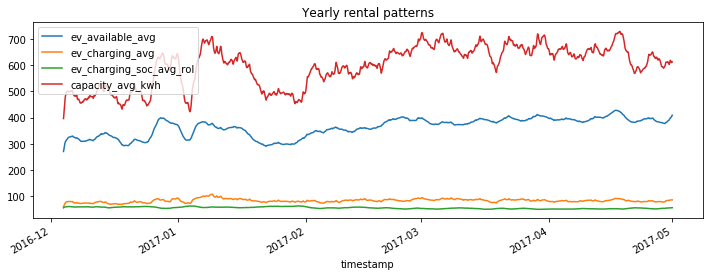

In [17]:
df = apply_smoother(df, days=3)
plot(df, "Yearly rental patterns")

## Weekly Pattern of connected EVS

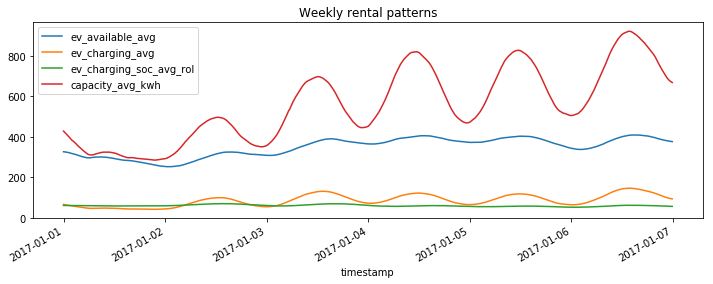

In [27]:
df = apply_smoother(df, days=0.5)
plot(df, "Weekly rental patterns", start=datetime(
    2017, 1, 1), end=datetime(2017, 1, 7))

## Daily Pattern of connected EVS

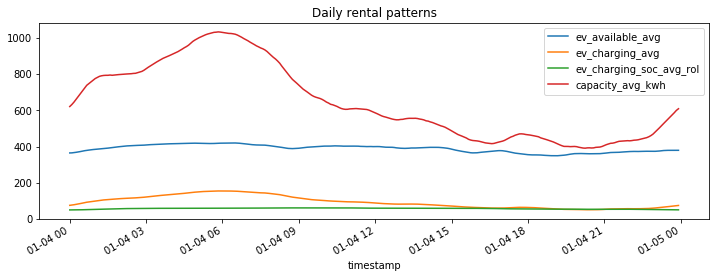

In [28]:
start = df_charging.index.searchsorted(datetime(2017, 1, 4))
end = df_charging.index.searchsorted(datetime(2017, 1, 5))

df = apply_smoother(df, days=1/24)
plot(df, "Daily rental patterns", start=datetime(
    2017, 1, 4), end=datetime(2017, 1, 5))